In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
from seaborn import violinplot
from matplotlib import pyplot as plt

In [45]:
candidates = ["michael bennet", "joseph biden",
              "michael bloomberg", "cory booker",
              "steve bullock", "pete buttigieg",
              "julian castro", "john delaney",
              "tulsi gabbard", "kamala harris",
              "amy klobuchar", "deval patrick",
              "bernie sanders", "joe sestak",
              "tom steyer", "elizabeth warren",
              "marianne williamson", "andrew yang",
              "donald trump", "joe walsh"]
candidate_tier = ['low', 'high', 'medium', 'medium', 'low', 'high', 'medium', 'low',
                 'medium', 'high', 'medium', 'low', 'high', 'low', 'medium', 'high',
                 'low', 'medium', 'high', 'low']
candidate_type = ['moderate', 'moderate', 'moderate', 'moderate', 'moderate', 'moderate',
                 'liberal', 'moderate', 'conservative', 'liberal', 'moderate', 'moderate',
                 'liberal', 'moderate', 'liberal', 'liberal', 'liberal', 'liberal',
                 'conservative', 'conservative']

def get_sent(df, name = '', do_print = False):
    '''Gets the sum of the score and prints some output to look pretty'''
    cum_sent = sum(df['Sentiment'])
    if name != '':
        name = name.title()
        name = 'Overall Sentiment for ' + name + ': '
    if do_print == True:
        print(name + str(cum_sent))
    return(cum_sent)

def w_cloud(candidate_text):
    '''Print word clouds for each candidate'''
    cloud = WordCloud(background_color = 'white').generate(candidate_text)
    plt.figure(figsize = (10,10))
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

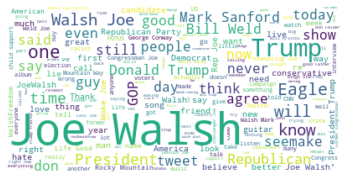

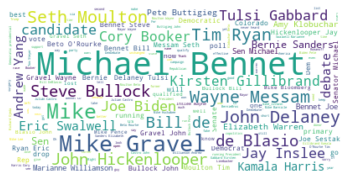

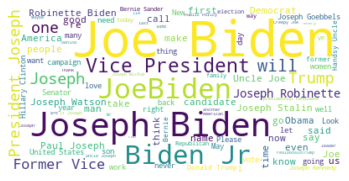

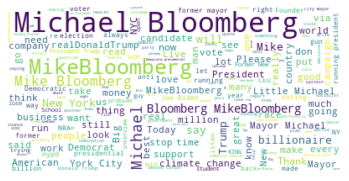

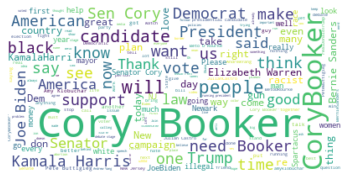

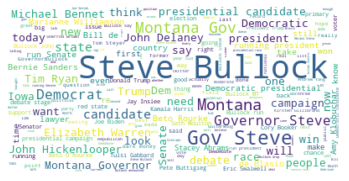

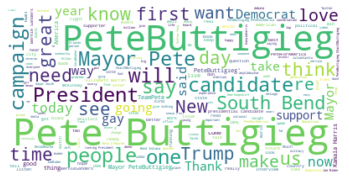

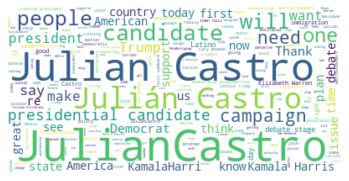

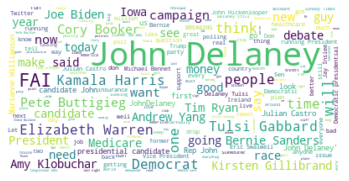

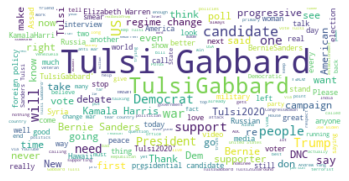

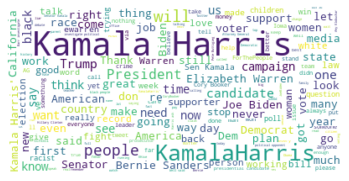

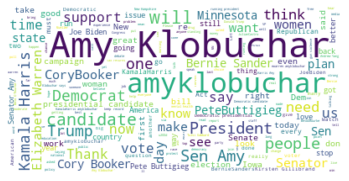

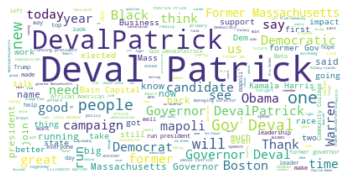

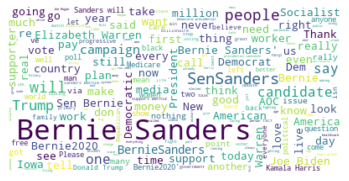

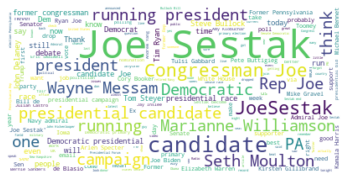

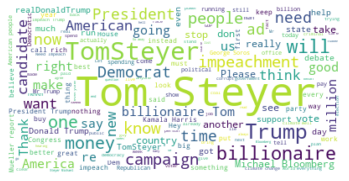

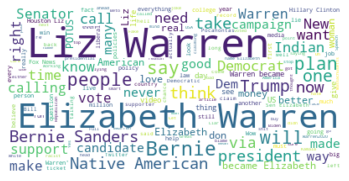

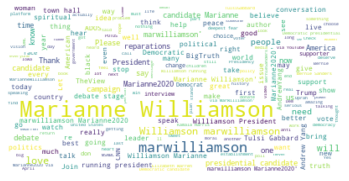

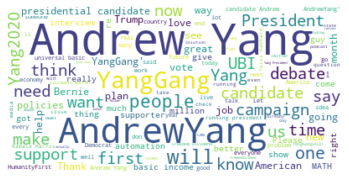

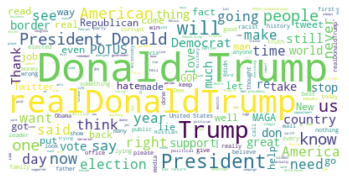

In [43]:
# Generate Word Clouds for Every Candidate
all_candidate_text = []
for i in range(0, len(candidates)):
    candidate_df = pd.read_json(candidates[i-1]+'.json')
    candidate_text = []
    for i in range(0, len(candidate_df['tweet'])):
        candidate_text = candidate_text + [candidate_df.loc[i, 'tweet']]
    all_candidate_text = all_candidate_text + candidate_text
    w_cloud(str(candidate_text))
w_cloud(str(all_candidate_text))

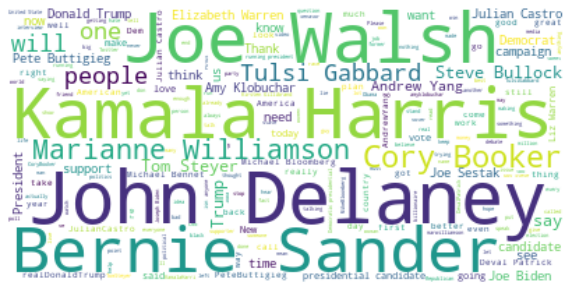

In [46]:
w_cloud(str(all_candidate_text))

Overall Sentiment for Michael Bennet: 34.356376268799984
Overall Sentiment for Joseph Biden: 50.408627925600015
Overall Sentiment for Michael Bloomberg: 81.85485778370007
Overall Sentiment for Cory Booker: 115.11254806370012
Overall Sentiment for Steve Bullock: 123.30289601499994
Overall Sentiment for Pete Buttigieg: 226.8948852810002
Overall Sentiment for Julian Castro: 165.8721284833
Overall Sentiment for John Delaney: 86.79100611560001
Overall Sentiment for Tulsi Gabbard: 121.20976863379997
Overall Sentiment for Kamala Harris: 97.65610937550005
Overall Sentiment for Amy Klobuchar: 159.81074958770012
Overall Sentiment for Deval Patrick: 103.07868421950008
Overall Sentiment for Bernie Sanders: 127.06371352899994
Overall Sentiment for Joe Sestak: 66.9617207198
Overall Sentiment for Tom Steyer: 98.3952064179
Overall Sentiment for Elizabeth Warren: 55.74584326980005
Overall Sentiment for Marianne Williamson: 212.4971962783003
Overall Sentiment for Andrew Yang: 184.73608027640014
Overall 

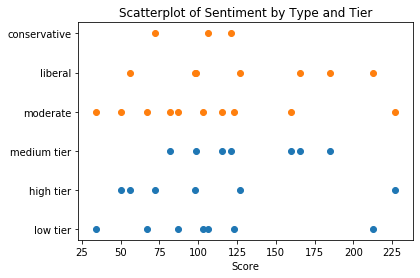

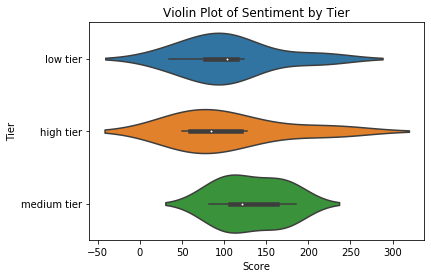

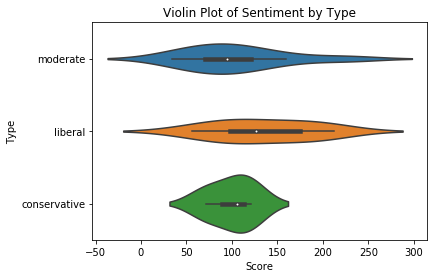

In [29]:
# Cumulative analysis
c_total = pd.DataFrame({'Name': candidates, 
                        'Score': 0, 
                        'Tier': candidate_tier,
                        'Type': candidate_type})
c_total['Tier'] = c_total['Tier'] + ' tier'

# Populates score column
for i in range(0, len(candidates)):
    candidate_df = pd.read_json(candidates[i]+'.json')
    c_total.loc[i, 'Score'] = get_sent(candidate_df, candidates[i], True)

# Scatterplot
plt.scatter(c_total['Score'], c_total['Tier'])
plt.scatter(c_total['Score'], c_total['Type'])
plt.title('Scatterplot of Sentiment by Type and Tier')
plt.xlabel('Score')
plt.show()

# Violin Plots
violinplot(x = 'Score', y = 'Tier', data = c_total)
plt.title('Violin Plot of Sentiment by Tier')
plt.show()
violinplot(x = 'Score', y = 'Type', data = c_total)
plt.title('Violin Plot of Sentiment by Type')
plt.show()